## Import Libraries

In [55]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

In [56]:
df = pd.read_csv('College_Data', index_col=0) # index_col=0 to put first column as index

In [57]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [59]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


# EDA

## Create a scatterplot of Grad.Rate versus Room.Board where the points are colored by the Private column. 

<AxesSubplot:xlabel='Room.Board', ylabel='Grad.Rate'>

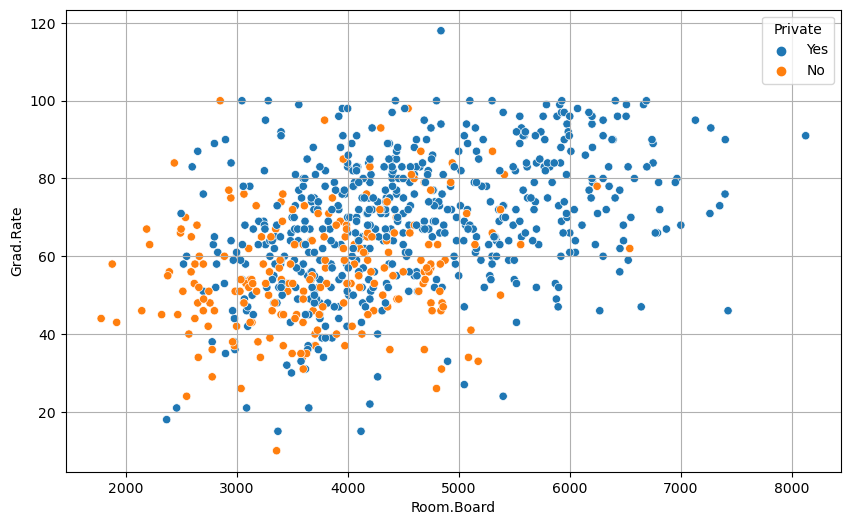

In [60]:
plt.figure(figsize=(10,6))
plt.grid()
sns.scatterplot(data=df,y='Grad.Rate',x='Room.Board',hue='Private')


## Create a scatterplot of F.Undergrad versus Outstate where the points are colored by the Private column.

<AxesSubplot:xlabel='Outstate', ylabel='F.Undergrad'>

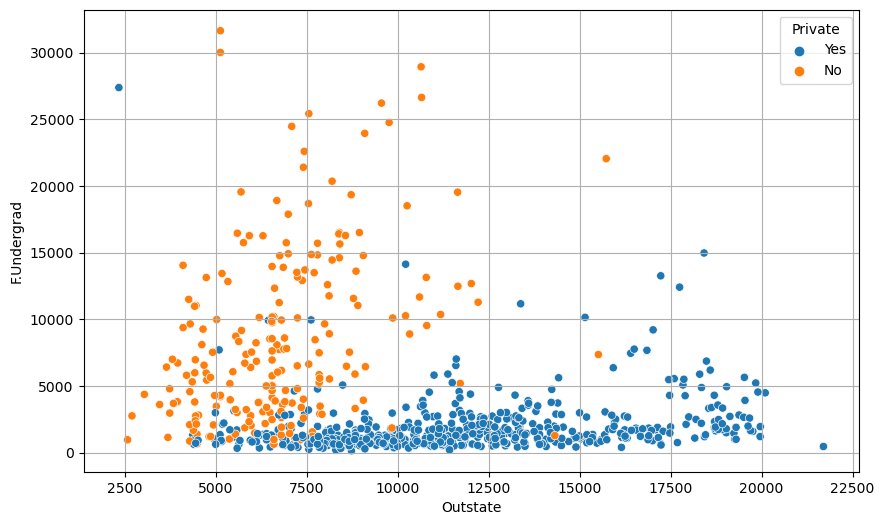

In [61]:
plt.figure(figsize=(10,6))
plt.grid()
sns.scatterplot(data=df,y='F.Undergrad',x='Outstate',hue='Private')

## Use sns.FacetGrid to create a stacked histogram showing Out of State Tuition based on the Private column. 

<Figure size 200x1600 with 0 Axes>

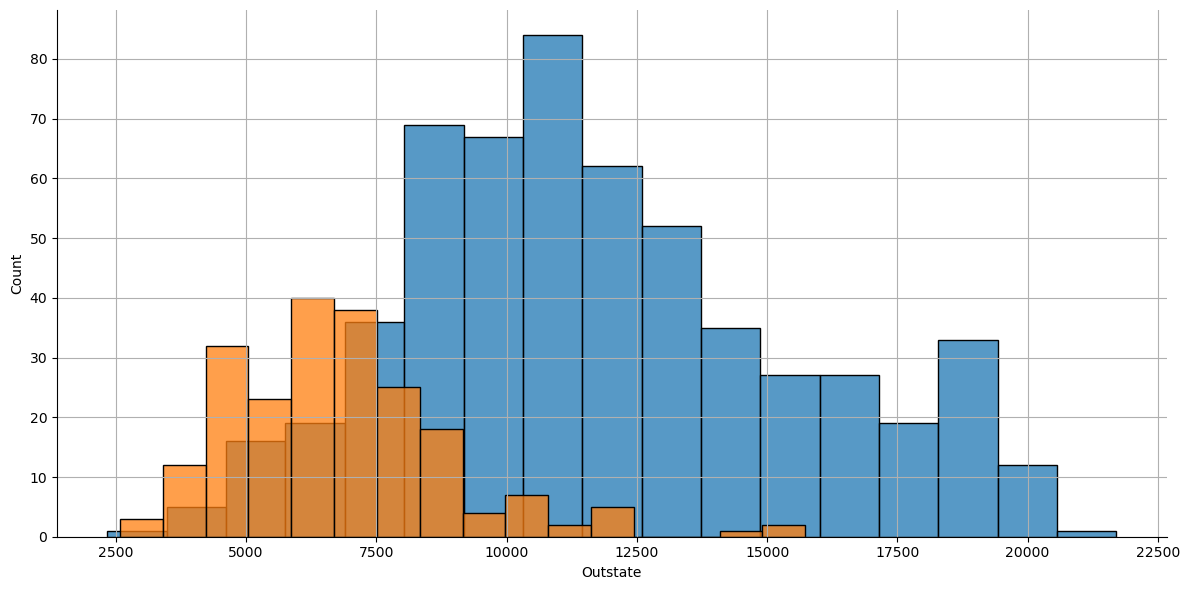

In [69]:


x=sns.FacetGrid(df,hue='Private',height=6,aspect=2,legend_out=False,despine=True)
x=x.map(sns.histplot,'Outstate')
plt.grid()

## Use sns.FacetGrid to create a stacked histogram showing Grad.Rate based on the Private column. 

<Figure size 200x1600 with 0 Axes>

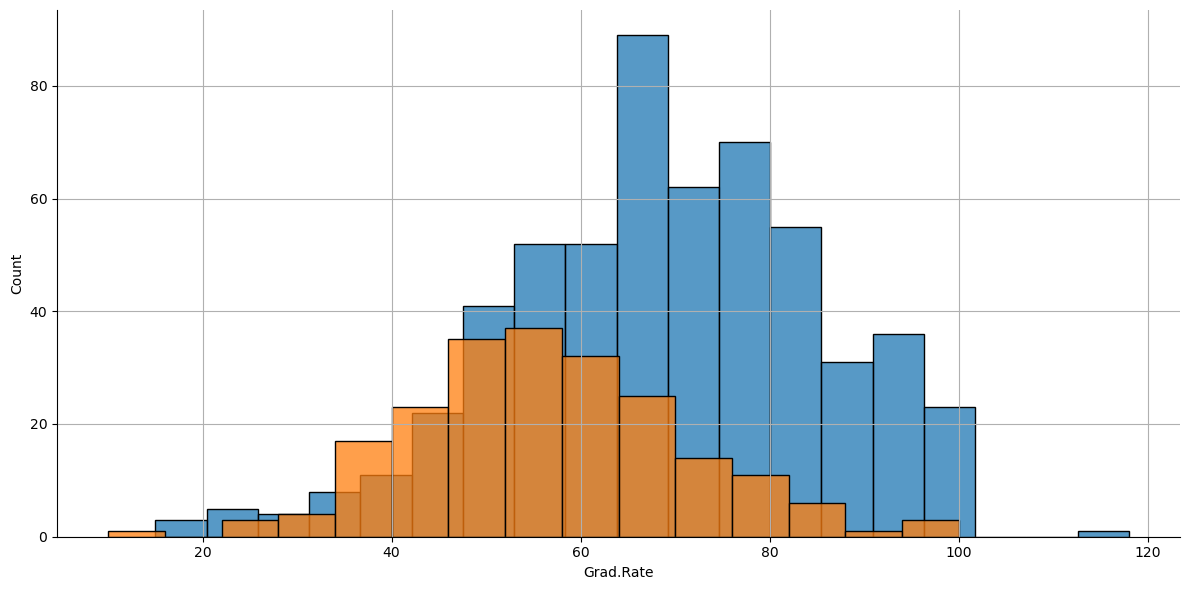

In [70]:
plt.figure(figsize=(2,16))
x=sns.FacetGrid(df,hue='Private',height=6,aspect=2,legend_out=False,despine=True)
x=x.map(sns.histplot,'Grad.Rate')
plt.grid()

## Notice how there seems to be a private school with a graduation rate of higher than 100%.What is the name of that school?

In [31]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [32]:
df=df[df['Grad.Rate'] < 100]

In [33]:
df[df['Grad.Rate'] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate


## Set that school's graduation rate to 100 then re-do the histogram visualization.

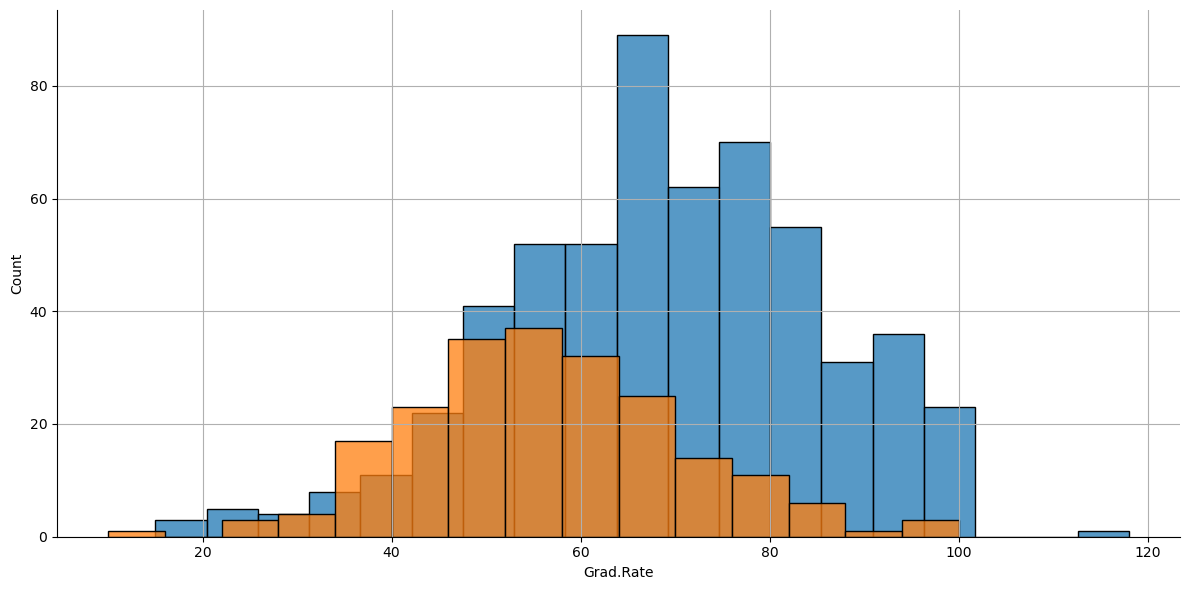

In [71]:

x=sns.FacetGrid(df,hue='Private',height=6,aspect=2,legend_out=False,despine=True)
x=x.map(sns.histplot,'Grad.Rate')
plt.grid()

## K Means Model

In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=2)

## Fit the model to all the data except for the Private label.

In [37]:
kmeans.fit(df.drop('Private', axis=1))

KMeans(n_clusters=2)

## What are the cluster center vectors?

In [38]:
kmeans.cluster_centers_

array([[ 1792.29179331,  1277.8449848 ,   488.30851064,    25.11854103,
           53.32370821,  2177.38297872,   591.9787234 , 10380.86170213,
         4305.75987842,   541.05775076,  1281.00911854,    70.44984802,
           77.82826748,    14.08647416,    23.10638298,  8917.25683891,
           64.59118541],
       [10287.10185185,  6570.90740741,  2570.84259259,    40.81481481,
           69.5462963 , 13086.62037037,  2497.28703704, 10648.01851852,
         4628.93518519,   595.9537037 ,  1706.14814815,    86.36111111,
           91.32407407,    14.11481481,    19.65740741, 13888.38888889,
           67.09259259]])

## Create a new column for df called 'Cluster', which is a 1 for a Private school, and a 0 for a public school.

In [42]:
df['Cluster']=df['Private'].apply(lambda x :1 if x == 'Yes' else 0)

In [43]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


## Create a confusion matrix and classification report to see how well the Kmeans clustering worked without being given any labels.

In [45]:
from sklearn.metrics import confusion_matrix , classification_report

In [46]:
classification_report(df['Cluster'],kmeans.labels_)

              precision    recall  f1-score   support

           0       0.21      0.64      0.31       211
           1       0.31      0.06      0.10       555

    accuracy                           0.22       766
   macro avg       0.26      0.35      0.21       766
weighted avg       0.28      0.22      0.16       766



In [47]:
confusion_matrix(df['Cluster'],kmeans.labels_)

array([[136,  75],
       [522,  33]], dtype=int64)